##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 初学者的 TensorFlow 2.0 教程

Advanced guide: https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/advanced.ipynb

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/tutorials/quickstart/beginner"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 观看</a>   </td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行 </a></td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 查看源代码</a>   </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/quickstart/beginner.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a>   </td>
</table>

此简短介绍使用 [Keras](https://tensorflow.google.cn/guide/keras/overview) 进行以下操作：

1. 加载一个预构建的数据集。
2. 构建对图像进行分类的神经网络机器学习模型。
3. 训练此神经网络。
4. 评估模型的准确率。

这是一个 [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) 笔记本文件。 Python程序可以直接在浏览器中运行，这是学习 Tensorflow 的绝佳方式。想要学习该教程，请点击此页面顶部的按钮，在Google Colab中运行笔记本。

1. 在 Colab中, 连接到Python运行环境： 在菜单条的右上方, 选择 *CONNECT*。
2. 运行所有的代码块: 选择 *Runtime* &gt; *Run all*。

## 设置 TensorFlow

首先将 TensorFlow 导入到您的程序：

In [1]:
import tensorflow as tf

In [ ]:
#指定GPU
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)
#初始化
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

如果您在自己的开发环境而不是 [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb) 中操作，请参阅设置 TensorFlow 以进行开发的[安装指南](https://tensorflow.google.cn/install)。

注：如果您使用自己的开发环境，请确保您已升级到最新的 `pip` 以安装 TensorFlow 2 软件包。有关详情，请参阅[安装指南](https://tensorflow.google.cn/install)。

## 数据集介绍
MNIST 数据集包含70000（60000+10000）个样本，其中有60000个训练样本和10000个测试样本，每个样本的像素大小为28*28。

在Keras中已经内置了多种公共数据集，其中就包含MNIST数据集，如图所示。
![](https://img-blog.csdnimg.cn/20210306205149957.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80NTk1NDQ1NA==,size_16,color_FFFFFF,t_70)
所以可以直接调用 tf.keras.datasets.mnist，直接下载数据集。

## 模型训练思路

这是数字识别模型的神经网络结构，如图所示。
* 1层隐含层（全连接层）
* 60000条训练数据和10000条测试数据，28x28像素的灰度图像
* 每个样本有28x28像素点，输入样本有2828=784个像素值；
* 故输入层设置784个节点；
* 隐含层尽量设置成2的n次幂个节点，故选择128个节点，隐含层激活函数：ReLU函数；
* 输出层用于输出数字识别结果0~9，故输出层设置10个节点，
* 输出层激活函数：softmax函数（实现多分类）
* 损失函数：稀疏交叉熵损失函数
* 输入层有784个节点，隐含层有128个神经元，输出层有10个节点


![](https://img-blog.csdnimg.cn/20210306225842624.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80NTk1NDQ1NA==,size_16,color_FFFFFF,t_70)




我们采用神经网络训练手写数字模型，分为以下几步：

## 1. 加载数据集

加载并准备 [MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。



将样本数据从整数转换为浮点数：

In [26]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

print('\n train_x:%s, train_y:%s, test_x:%s, test_y:%s'%(train_x.shape,train_y.shape,test_x.shape,test_y.shape))


 train_x:(60000, 28, 28), train_y:(60000,), test_x:(10000, 28, 28), test_y:(10000,)


从这里可以看出数据集的结构形状train_x存放了60000张28*28像素的数字图像，并有train_y有60000条标签值与之相对应，用于训练模型；test_x和test_y同理，用于测试模型。

## 2. 数据预处理

In [27]:
#归一化、并转换为tensor张量，数据类型为float32.
x_train,x_test = tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32)   #归一化
y_train,y_test = tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)

## 3. 构建机器学习模型

通过堆叠层来构建 `tf.keras.Sequential` 模型。
由于数据集比较简单，使用单层隐含层的神经网络就可以达到足够低的损失和较高的准确率。

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #添加Flatten层说明输入数据的形状
  tf.keras.layers.Dense(128, activation='relu'), #添加隐含层，为全连接层，128个节点，relu激活函数
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') #添加输出层，为全连接层，10个节点，softmax激活函数
])
print('\n',model.summary())     #查看网络结构和参数信息

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 None


## 4. 配置模型训练方法

对于每个样本，模型都会返回一个包含 [logits](https://developers.google.com/machine-learning/glossary#logits) 或 [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) 分数的向量，每个类一个。

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.09987934, 0.10044068, 0.09985069, 0.10001198, 0.09989322,
        0.10015649, 0.10003187, 0.09975901, 0.09998547, 0.09999119]],
      dtype=float32)

`tf.nn.softmax` 函数将这些 logits 转换为每个类的*概率*：

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.09998792, 0.10004407, 0.09998506, 0.10000119, 0.09998932,
        0.10001564, 0.10000318, 0.0999759 , 0.09999854, 0.09999911]],
      dtype=float32)

注：可以将 `tf.nn.softmax` 烘焙到网络最后一层的激活函数中。虽然这可以使模型输出更易解释，但不建议使用这种方式，因为在使用 softmax 输出时不可能为所有模型提供精确且数值稳定的损失计算。

使用 `losses.SparseCategoricalCrossentropy` 为训练定义损失函数，它会接受 logits 向量和 `True` 索引，并为每个样本返回一个标量损失。

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

此损失等于 true 类的负对数概率：如果模型确定类正确，则损失为零。

这个未经训练的模型给出的概率接近随机（每个类为 1/10），因此初始损失应该接近 `-tf.math.log(1/10) ~= 2.3`。

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.3024287

在开始训练之前，使用 Keras `Model.compile` 配置和编译模型。将 [`optimizer`](https://tensorflow.google.cn/api_docs/python/tf/keras/optimizers) 类设置为 `adam`，将 `loss` 设置为您之前定义的 `loss_fn` 函数，并通过将 `metrics` 参数设置为 `accuracy` 来指定要为模型评估的指标。

In [31]:
# adam算法参数采用keras默认的公开参数，损失函数采用稀疏交叉熵损失函数，准确率采用稀疏分类准确率函数
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


# model.compile(optimizer='adam',
#               loss=loss_fn,
#               metrics=['accuracy'])

## 5. 训练模型

使用 `Model.fit` 方法调整您的模型参数并最小化损失：

批量训练大小为64，迭代5次，测试集比例0.2（48000条训练集数据，12000条测试集数据）

In [32]:
history = model.fit(x_train, y_train, batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 20.8932 - sparse_categorical_accuracy: 0.9155 - val_loss: 11.8010 - val_sparse_categorical_accuracy: 0.9394
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 11.9971 - sparse_categorical_accuracy: 0.9202 - val_loss: 7.2522 - val_sparse_categorical_accuracy: 0.9404
Epoch 3/5
750/750 [==============================] - 3s 5ms/step - loss: 7.5469 - sparse_categorical_accuracy: 0.9178 - val_loss: 4.6259 - val_sparse_categorical_accuracy: 0.9392
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 4.9697 - sparse_categorical_accuracy: 0.9136 - val_loss: 3.1684 - val_sparse_categorical_accuracy: 0.9362
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 3.4359 - sparse_categorical_accuracy: 0.9062 - val_loss: 2.2360 - val_sparse_categorical_accuracy: 0.9340


`Model.evaluate` 方法通常在 "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" 或 "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)" 上检查模型性能。

## 6. 评估模型

In [33]:
model.evaluate(x_test,  y_test, verbose=2) #每次迭代输出一条记录，来评价该模型是否有比较好的泛化能力

313/313 - 1s - loss: 2.1232 - sparse_categorical_accuracy: 0.9320 - 569ms/epoch - 2ms/step


[2.1231706142425537, 0.9319999814033508]

现在，这个照片分类器的准确度已经达到 98%。想要了解更多，请阅读 [TensorFlow 教程](https://tensorflow.google.cn/tutorials/)。

如果您想让模型返回概率，可以封装经过训练的模型，并将 softmax 附加到该模型：

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

## 保存模型

保存模型的格式可分为两种：
·HDF5格式
·SavedModel格式
二者的区别我会在后续的文章中介绍，我采用的是HDF5格式，这里不赘述。

保存模型的方式也可分为两种：
·仅保存模型参数model.save_weights()
·保存整个模型model.save()
二者的区别我也会在后续的文章中介绍，这两种方式都可以尝试一下，代码如下


In [14]:
#保存模型参数
#model.save_weights('mnist_weights.h5')
#保存整个模型
model.save('mnist_weights.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#加载模型参数
history = model.load_weights('C:\\Users\\xuyansong\\Desktop\\深度学习\\python\\MNIST\\模型参数\\mnist_weights.h5') #路径根据文件实际位置修改，不然会报错


#加载整个模型
model = tf.keras.models.load_model('C:\\Users\\xuyansong\\Desktop\\深度学习\\python\\MNIST\\整个模型\\mnist_weights.h5')	#路径根据文件实际位置修改，不然会报错
model.summary()     #查看摘要

## 结果可视化

{'loss': [20.893238067626953, 11.997140884399414, 7.546853065490723, 4.969663143157959, 3.4359312057495117], 'sparse_categorical_accuracy': [0.9154583215713501, 0.9201874732971191, 0.9178125262260437, 0.9136041402816772, 0.90625], 'val_loss': [11.801015853881836, 7.252245903015137, 4.625871181488037, 3.168442487716675, 2.2360241413116455], 'val_sparse_categorical_accuracy': [0.9394166469573975, 0.940416693687439, 0.9391666650772095, 0.9362499713897705, 0.9340000152587891]}


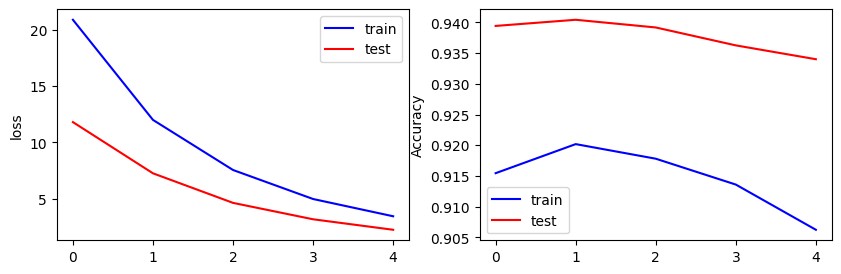

In [35]:
#结果可视化
print(history.history)
loss = history.history['loss']          #训练集损失
val_loss = history.history['val_loss']  #测试集损失
acc = history.history['sparse_categorical_accuracy']            #训练集准确率
val_acc = history.history['val_sparse_categorical_accuracy']    #测试集准确率

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(loss,color='b',label='train')
plt.plot(val_loss,color='r',label='test')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(acc,color='b',label='train')
plt.plot(val_acc,color='r',label='test')
plt.ylabel('Accuracy')
plt.legend()

#暂停5秒关闭画布，否则画布一直打开的同时，会持续占用GPU内存
#plt.ion()       #打开交互式操作模式
#plt.show()
#plt.pause(5)
#plt.close()

plt.show()


## 使用模型推理

从测试集样本中随机抽取10张图像，并展示结果：

1/1 [==============================] - 0s 19ms/step


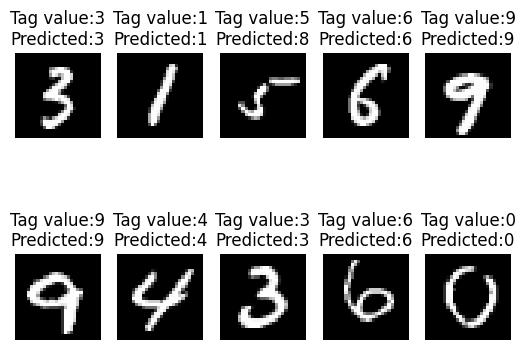

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
for i in range(10):
    num = np.random.randint(1,10000)	#在1~10000之间生成随机整数

    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(test_x[num],cmap='gray')
    demo = tf.reshape(test_x[num],(1,28,28))
    y_pred = np.argmax(model.predict(demo))
    plt.title('Tag value:'+str(test_y[num])+'\nPredicted:'+str(y_pred))


## 结论

恭喜！您已经利用 [Keras](https://tensorflow.google.cn/guide/keras/overview) API 借助预构建数据集训练了一个机器学习模型。

有关使用 Keras 的更多示例，请查阅[教程](https://tensorflow.google.cn/tutorials/keras/)。要详细了解如何使用 Keras 构建模型，请阅读[指南](https://tensorflow.google.cn/guide/keras)。如果您想详细了解如何加载和准备数据，请参阅有关[图像数据加载](https://tensorflow.google.cn/tutorials/load_data/images)或 [CSV 数据加载](https://tensorflow.google.cn/tutorials/load_data/csv)的教程。
